In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [160]:
def find_nonzero_runs(sequence):
    seq = np.asarray(sequence, dtype=np.bool)
    assert (seq.ndim == 1)
    nonzeros, = np.nonzero(seq)
    run_start_idx = np.ones_like(nonzeros, dtype=np.bool)
    run_stop_idx  = np.ones_like(nonzeros, dtype=np.bool)
    # shift and subtract to find gaps:
    shifts = ((nonzeros[1:] - nonzeros[:-1])>1)
    run_start_idx[1:] = shifts
    run_stop_idx[:-1] = shifts
    # return starts, and length
    run_start = nonzeros[run_start_idx]
    run_stop  = nonzeros[run_stop_idx]
    run_lengths = run_stop - run_start + 1
    # returning ...
    return run_start, run_lengths


def transform_bed(df,value_id=3,value_threhsold=-0.000001):
    """
    feed one chromosome at a time in here.
    """
    strt,lens = find_nonzero_runs(df[value_id]<value_threhsold)
    stps = strt + lens-1
    ins_starts = df[1].iloc[strt].values
    ins_stops = df[2].iloc[stps].values
    ins_chr1 = df[0].iloc[strt].values
    ins_chr2 = df[0].iloc[stps].values
    assert (ins_chr1 == ins_chr2).all()
    return pd.DataFrame({"chrom":ins_chr1,"start":ins_starts,"stop":ins_stops})
    
    
    
def transform_bed_genome(df,chrom_id=0):
    chroms = df[chrom_id].unique()
    df_chr_tr = []
    for chrom in chroms:
        df_chr = df[df[chrom_id]==chrom]
        df_chr_tr.append(transform_bed(df_chr))
    return pd.concat(df_chr_tr)
        
      


In [239]:
ls


Count_inspot_runs.ipynb
U54-ESC4DN-FA-DpnII-2017524-R1.inspot.tab
U54-ESC4DN-FA-DpnII-2017524-R1-R2.inspot.tab
U54-ESC4DN-FA-DpnII-2017524-R2.inspot.tab
U54-HFFc6-p17-FA-DpnII-20170327_hg38.inspot.tab
U54-HFFc6-p17-FA-DpnII-20170327_hg38.inspot.tab.bed
U54-HFFc6-p17-p22-FA-DpnII-20170327_hg38.inspot.tab
U54-HFFc6-p17-p22-FA-DpnII-20170327_hg38.inspot.tab.bed
U54-HFFc6-p22-FA-DpnII-20170327_hg38.inspot.tab
U54-HFFc6-p22-FA-DpnII-20170327_hg38.inspot.tab.bed


In [241]:
t1 = 'U54-ESC4DN-FA-DpnII-2017524-R1.inspot.tab'
t12 = 'U54-ESC4DN-FA-DpnII-2017524-R1-R2.inspot.tab'
t2 = 'U54-ESC4DN-FA-DpnII-2017524-R2.inspot.tab'


f1 = 'U54-HFFc6-p17-FA-DpnII-20170327_hg38.inspot.tab'
f2 = 'U54-HFFc6-p22-FA-DpnII-20170327_hg38.inspot.tab'
f12 = 'U54-HFFc6-p17-p22-FA-DpnII-20170327_hg38.inspot.tab'

fs = [f1,f2,f12]

for f in fs:
    df = pd.read_table(f,header=None)
    transform_bed_genome(df).to_csv(f+'.bed',sep='\t',header=None,index=None)

    
ts = [t1,t2,t12]

for t in ts:
    df = pd.read_table(t,header=None)
    transform_bed_genome(df).to_csv(t+'.bed',sep='\t',header=None,index=None)




In [246]:
! wc -l $f1'.bed'
! wc -l $f2'.bed'
!bed_intersect_basewise.py $f1'.bed'  $f2'.bed' |wc -l

19891 U54-HFFc6-p17-FA-DpnII-20170327_hg38.inspot.tab.bed
21698 U54-HFFc6-p22-FA-DpnII-20170327_hg38.inspot.tab.bed
17701


In [245]:
! wc -l $t1'.bed'
! wc -l $t2'.bed'
!bed_intersect_basewise.py $t1'.bed'  $t2'.bed' |wc -l

24850 U54-ESC4DN-FA-DpnII-2017524-R1.inspot.tab.bed
25666 U54-ESC4DN-FA-DpnII-2017524-R2.inspot.tab.bed
23360


In [248]:
17701/21698


0.8157894736842105

In [247]:
23360/25666

0.9101535104807917

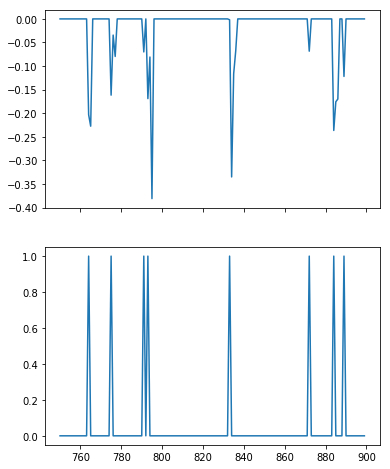

In [141]:
# for i in df[3][1013:1021]:
#     print(i<-0.0001)

start,stop = 750, 900


dfff = np.zeros_like(df[3])
dfff[rrr] = 1

# rrr_within = rrr[(rrr>=start)&(rrr<=stop)]
# print(rrr_within)
# print(np.ones_like(rrr_within))

f,axs = plt.subplots(nrows=2,sharex=True,figsize=(6,8))
ax1,ax2 = axs

x = df[3][start:stop].index

ax1.plot(x,df[3][start:stop])
ax2.plot(x,dfff[start:stop])


In [143]:
(rrr).size

19869

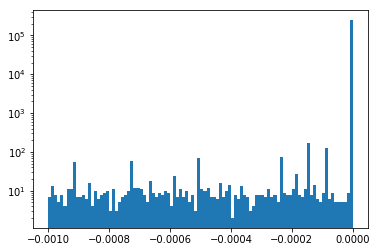

In [46]:
plt.hist(df[3][df[3]>-0.001],log=1,bins=100)
ax = plt.gca()
# ax.set_xscale('log')

In [64]:
find_runs(df[3])[1]

array([     0,      1,      2, ..., 308762, 308763, 308764])

In [113]:
aaa = [0,0,0,1,1,1,1,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1]
find_nonzero_runs(aaa)

(array([ 3, 10, 19, 40]), array([ 4,  4, 10,  2]))

In [102]:
# cc[1:] - cc[:-1]
cc
cc[:-1]-cc[1:]

array([-1, -1, -1, -1, -5, -1, -1, -1])

In [100]:
y[3:12].sum()

5